Text(35, 0, 'Sundays  River')

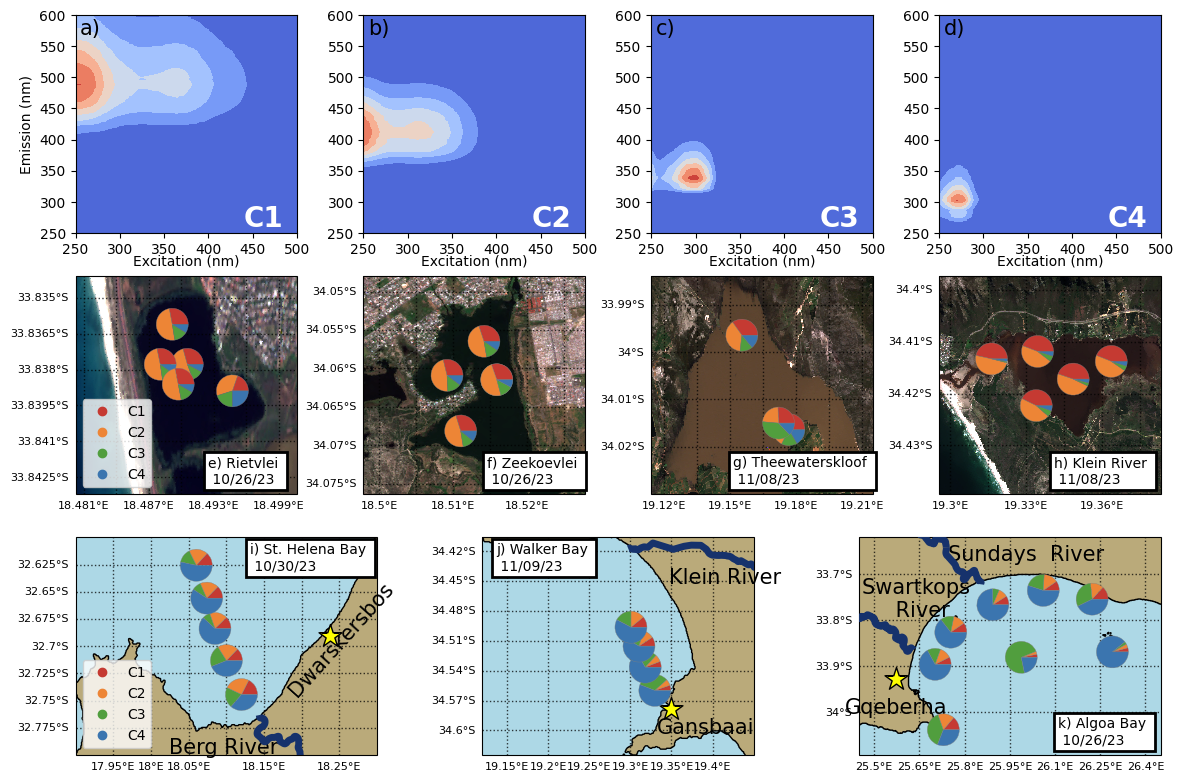

In [6]:
import sys
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
coastline = cfeature.GSHHSFeature(scale='full',levels=[1]) 
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
import geopandas as gpd
import pickle
import warnings
warnings.simplefilter('ignore')


file_name =  'BioSCape_PARAFAC_4comps.xlsx'

ex = np.array(np.squeeze(pd.read_excel(io=file_name,sheet_name='ex')))
em = np.array(np.squeeze(pd.read_excel(io=file_name,sheet_name='em')))

comps = ['C1','C2','C3','C4']
lts = ['a)', 'b)','c)','d)']

fig = plt.figure(figsize=(14, 13))


outer_gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1], figure=fig)
gs_row1 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_gs[0], wspace=0.3)

for i, (comp, lt) in enumerate(zip(comps, lts)):
    c= np.array(pd.read_excel(io=file_name,sheet_name=comp))

    ax = fig.add_subplot(gs_row1[0, i])
    ax.contourf(ex,em,c,cmap = 'coolwarm')
    ax.set_xlim([250, 500])
    ax.set_ylim([250, 600])
    ax.text(440,260, comp,fontsize = 20, fontweight = 'bold',color = 'white')
    
    ax.text(0.02,0.91, lt,transform=ax.transAxes,fontsize = 15)
    
    if comp == 'C1':
        ax.set_ylabel('Emission (nm)')
   
    ax.set_xlabel('Excitation (nm)', labelpad=-1.8)
        
## Row 2 Inland Bodies-------------------------------------------------------------
with open('rietvlei_rgb_basemap.pkl','rb') as f:  # Python 3: open(..., 'rb')
    rv_lon, rv_lat, rv_r, rv_ct = pickle.load(f)  
    
with open('zeekovlei_rgb_basemap.pkl','rb') as f:  # Python 3: open(..., 'rb')
    zk_lon, zk_lat, zk_r, zk_ct = pickle.load(f)  
     
with open('theewaterskloof_rgb_basemap.pkl','rb') as f:  # Python 3: open(..., 'rb')
    tw_lon, tw_lat, tw_r, tw_ct = pickle.load(f)  
       
with open('kleinriver_rgb_basemap.pkl','rb') as f:  # Python 3: open(..., 'rb')
    kr_lon, kr_lat, kr_r, kr_ct = pickle.load(f)  
       
colors=['#C53A32','#ED8536','#519E3E','#3B75AF']

gs_row2 = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=outer_gs[1], wspace=0.3)


# fig = plt.figure(figsize=(12,9),layout = "compressed")
# gs = fig.add_gridspec(4, 4)

ax1 = fig.add_subplot(gs_row2[0,0], projection=ccrs.PlateCarree(),aspect="auto")
ax1.set_extent([18.500677,18.480256, -33.843193, -33.834107], crs=ccrs.PlateCarree())
#ax1.add_feature(coastline, ec=(0,0,0,1),fc=(0.5,0.5,0.5,0.5))
ax1.pcolormesh(rv_lon, rv_lat, rv_r, color=rv_ct)
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='k', alpha=0.75, linestyle=':')
    
gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

rv_lat = [-33.83889, -33.83778, -33.83611, -33.83778, -33.83861]
rv_lon = [18.49472, 18.49056, 18.48917, 18.48806, 18.48972]
rv_lbs = ['RV1A', 'RV1B', 'RV1C', 'RV1D', 'RV1DE']

## add pie charts
file_name =  '/Users/opticslab/Documents/BIOSCAPE/spreadsheets/BIOSCAPE_all_Fmax.xlsx'
Fmax = pd.read_excel(io=file_name,sheet_name='Model4Loading')

# Rietvlei ['RV1A', 'RV1B', 'RV1C', 'RV1D', 'RV1DE']
surf_ind = [10, 11, 13, 15, 17]

for lat, lon, ind in zip(rv_lat, rv_lon,surf_ind):

    ax_sub = inset_axes(ax1, width=0.4, height=0.4, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax1.transData)
    # Calcualte percent contribution
    perc_cont = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]] / np.sum([Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]])
    fluormax = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]]
    # print('Rietvlei')
    # print(fluormax)
    ax_sub.pie(perc_cont, colors=colors,wedgeprops={'edgecolor': 'gray','linewidth': 0.25})
    
legend_elements = [Line2D([0], [0], marker='o', color='#C53A32', markerfacecolor='#C53A32',linestyle='None',label='C1'),
                   Line2D([0], [0], marker='o', color='#ED8536', markerfacecolor='#ED8536',linestyle='None', label='C2'),
                   Line2D([0], [0], marker='o', color='#519E3E', markerfacecolor='#519E3E',linestyle='None', label='C3'),
                   Line2D([0], [0], marker='o', color='#3B75AF', markerfacecolor='#3B75AF',linestyle='None', label='C4'),]
                  

ax1.legend(handles=legend_elements, loc='lower left', fontsize = "10")

ax1.text(0.6,0.05, 'e) Rietvlei \n 10/26/23',bbox=dict(boxstyle="square",pad=0.3,
                      fc="white", ec="black", lw=2),transform=ax1.transAxes)

# Zeekovlei
ax2 = fig.add_subplot(gs_row2[0,1], projection=ccrs.PlateCarree(),aspect="auto")
ax2.set_extent([18.527867,18.497833, -34.076343, -34.048002], crs=ccrs.PlateCarree())
#ax2.add_feature(coastline, ec=(0,0,0,1),fc=(0.5,0.5,0.5,0.5))
ax2.pcolormesh(zk_lon, zk_lat, zk_r, color=zk_ct)

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='k', alpha=0.75, linestyle=':')
    
gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

zk_lat = [-34.06090, -34.05646, -34.06147,	-34.06147, -34.06814]
zk_lon = [18.50917, 18.51418, 18.51591, 18.51592, 18.51102]
zk_lbs = ['ZK3A', 'ZK3B', 'ZK3C', 'ZK3D', 'ZK3E']


surf_ind = [48, 50, 52, 54, 56]

for lat, lon, ind in zip(zk_lat, zk_lon,surf_ind):

    ax_sub = inset_axes(ax1, width=0.4, height=0.4, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax2.transData)
    # Calcualte percent contribution
    perc_cont = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]] / np.sum([Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]])
    ax_sub.pie(perc_cont, colors=colors, wedgeprops={'edgecolor': 'gray','linewidth': 0.25})
    fluormax = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]]
    # print('Zeekovlei')
    # print(fluormax)

ax2.text(0.56,0.05, 'f) Zeekoevlei \n 10/26/23',bbox=dict(boxstyle="square",pad=0.3,
                      fc="white", ec="black", lw=2),transform=ax2.transAxes)



# Theewaterskloof
ax3 = fig.add_subplot(gs_row2[0,2], projection=ccrs.PlateCarree(),aspect="auto")

ax3.set_extent([19.214779,19.114112, -33.983927, -34.03], crs=ccrs.PlateCarree())
#ax3.add_feature(coastline, ec=(0,0,0,1),fc=(0.5,0.5,0.5,0.5))
ax3.pcolormesh(tw_lon, tw_lat, tw_r, color=tw_ct)

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='k', alpha=0.75, linestyle=':')
    
gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

tw_lat = [-34.01638889,	-34.015, -33.99638889]
tw_lon = [19.17666667, 19.17194444, 19.15527778]
tw_lbs = ['TW3A', 'TW3B', 'TW3C']


# Rietvlei ['RV1A', 'RV1B', 'RV1C', 'RV1D', 'RV1DE']
surf_ind = [39, 41, 43]

for lat, lon, ind in zip(tw_lat, tw_lon,surf_ind):

    ax_sub = inset_axes(ax1, width=0.4, height=0.4, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax3.transData)
    # Calcualte percent contribution
    perc_cont = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]] / np.sum([Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]])
    fluormax = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]]
    # print('Theewaterskloof')
    # print(fluormax)
    ax_sub.pie(perc_cont, colors=colors, wedgeprops={'edgecolor': 'gray','linewidth': 0.25})
    
   

ax3.text(0.37,0.05, 'g) Theewaterskloof \n 11/08/23',bbox=dict(boxstyle="square",pad=0.3,
                      fc="white", ec="black", lw=2),transform=ax3.transAxes)


# # Klein River
ax4 = fig.add_subplot(gs_row2[0,3], projection=ccrs.PlateCarree(),aspect="auto")

# northwest -34.397399, 19.295642
# southeast -34.439351, 19.383070

ax4.set_extent([19.383070,19.295642, -34.439351, -34.397399], crs=ccrs.PlateCarree())
#ax4.add_feature(coastline, ec=(0,0,0,1),fc=(0.5,0.5,0.5,0.5))
ax4.pcolormesh(kr_lon, kr_lat, kr_r, color=kr_ct)

gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='k', alpha=0.75, linestyle=':')
    
gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

kr_lat = [-34.411881, -34.4138, -34.422327, -34.417212, -34.413314]
kr_lon = [19.334497, 19.3636, 19.333976, 19.348566, 19.316308]
kr_lbs = ['KR1A','KR1B','KR1C','KR1D','KR1E']


surf_ind = [0, 2, 4, 6, 8]

for lat, lon, ind in zip(kr_lat, kr_lon,surf_ind):

    ax_sub = inset_axes(ax1, width=0.4, height=0.4, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax4.transData)
    # Calcualte percent contribution
    perc_cont = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]] / np.sum([Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]])
    ax_sub.pie(perc_cont, colors=colors,wedgeprops={'edgecolor': 'gray','linewidth': 0.25})
    fluormax = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]]
    # print('Klein River')
    # print(fluormax)

ax4.text(0.52,0.05, 'h) Klein River \n 11/08/23',bbox=dict(boxstyle="square",pad=0.3,
                      fc="white", ec="black", lw=2),transform=ax4.transAxes)


## Row 3 coastal bays----------------------------------------------


filename = "/Users/opticslab/Documents/BIOSCAPE/bathymetry/Willem de Wet Bathymetry of Southern Africa Continental Shelf.grd"

klein_river = gpd.read_file('/Users/opticslab/Documents/BIOSCAPE/rivers/klein_river.geojson')
klein_river["geometry"] =klein_river["geometry"].translate(xoff=0.005)
berg_river = gpd.read_file('/Users/opticslab/Documents/BIOSCAPE/rivers/berg_river.geojson')
berg_river["geometry"] =berg_river["geometry"].translate(yoff=0.005)

swartkops_river = gpd.read_file('/Users/opticslab/Documents/BIOSCAPE/rivers/swartkops_river.geojson')
sundays_river = gpd.read_file('/Users/opticslab/Documents/BIOSCAPE/rivers/sundays_river.geojson')


with open('berg_river.pkl', 'rb') as f:  # Python 3: open(..., 'wb')
    bergriv_lon, bergriv_lat, bergriv_val = pickle.load(f)

gs_row3 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer_gs[2], wspace=0.3)

ax1 = fig.add_subplot(gs_row3[0,0], projection=ccrs.PlateCarree(),aspect="auto")

ax1.patch.set_facecolor('#ADD8E6')
ax1.set_extent([18.3,17.9, -32.8, -32.6], crs=ccrs.PlateCarree())
ax1.add_feature(coastline, ec=(0,0,0,1),fc='#BAAA7A')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='k', alpha=0.75, linestyle=':')
    
gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

SHB_lat = [-32.7444,  -32.7132,  -32.6837,  -32.6558,  -32.6256]
SHB_lon = [18.1202,   18.1002,   18.0850,   18.0740,   18.0602]
SHB_lbs = ['SB1', 'SB2', 'SB3', 'SB4', 'SB5']

## add pie charts
file_name =  '/Users/opticslab/Documents/BIOSCAPE/spreadsheets/BIOSCAPE_all_Fmax.xlsx'
Fmax = pd.read_excel(io=file_name,sheet_name='Model4Loading')

colors=['#C53A32','#ED8536','#519E3E','#3B75AF']
# St. Helena Bay St1, St2, St3, St4 10/30/2023
surf_ind = [97, 99, 101, 104, 107]

for lat, lon, ind in zip(SHB_lat, SHB_lon,surf_ind):

    ax_sub = inset_axes(ax1, width=0.4, height=0.4, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax1.transData)
    
    # Calcualte percent contribution
    perc_cont = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]] / np.sum([Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]])
    fluormax = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]]
    # print(fluormax)
    ax_sub.pie(perc_cont, colors=colors,wedgeprops={'edgecolor': 'gray','linewidth': 0.25})
    
legend_elements = [Line2D([0], [0], marker='o', color='#C53A32', markerfacecolor='#C53A32',linestyle='None',label='C1'),
                   Line2D([0], [0], marker='o', color='#ED8536', markerfacecolor='#ED8536',linestyle='None', label='C2'),
                   Line2D([0], [0], marker='o', color='#519E3E', markerfacecolor='#519E3E',linestyle='None', label='C3'),
                   Line2D([0], [0], marker='o', color='#3B75AF', markerfacecolor='#3B75AF',linestyle='None', label='C4'),]
                  

ax1.legend(handles=legend_elements, loc='lower left', fontsize = "10")

ax1.text(0.58,0.85, 'i) St. Helena Bay \n 10/30/23',bbox=dict(boxstyle="square",pad=0.3,
                      fc="white", ec="black", lw=2),transform=ax1.transAxes)

berg_river.plot(ax=ax1, color="#16326C", linewidth=5, label="River", zorder = 5)
ax1.set_aspect('auto')
ax1.scatter(18.237731,-32.690843,  s=300, marker = '*', cmap='turbo',edgecolors = 'black', color = 'yellow',zorder=8)
ax1.annotate('Dwarskersbos', (18.238,-32.71), rotation = 48, textcoords="offset points", xytext=(8,-28), ha='center',color = 'black', fontsize = 15)
ax1.annotate('Berg River', (18.06,-32.78), textcoords="offset points", xytext=(20,-15), ha='center',color = 'black', fontsize = 15)


# # Walker Bay


ax2 = fig.add_subplot(gs_row3[0,1], projection=ccrs.PlateCarree(),aspect="auto")
ax2.patch.set_facecolor('#ADD8E6')
ax2.set_extent([19.45,19.12, -34.624719, -34.406115], crs=ccrs.PlateCarree())
ax2.add_feature(coastline, ec=(0,0,0,1),fc='#BAAA7A')
gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='k', alpha=0.75, linestyle=':')
    
gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}

WB_lat = [-34.5598025, -34.53643167,-34.51526167, -34.496295]#, -34.4704083, -34.4559425	]
WB_lon = [19.32974,19.318015, 19.310449167, 19.3006783]#, 19.28072167, 19.2557475]
WB_lbs = ['WB1', 'WB2', 'WB', 'WB4']#, 'WB5','WB6']

## add pie charts
# Walker bay St1, St2, St3, St4 11/09/2023
surf_ind = [134, 135, 137, 139]

for lat, lon, ind in zip(WB_lat, WB_lon,surf_ind):

    ax_sub = inset_axes(ax2, width=0.4, height=0.4, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax2.transData)
    
    # Calcualte percent contribution
    perc_cont = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]] / np.sum([Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]])
    ax_sub.pie(perc_cont, colors=colors,wedgeprops={'edgecolor': 'gray','linewidth': 0.25})
    fluormax = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]]
    # print(fluormax)
    
ax2.text(0.05,0.85, 'j) Walker Bay \n 11/09/23',bbox=dict(boxstyle="square",pad=0.3,
                     fc="white", ec="black", lw=2),transform=ax2.transAxes)

klein_river.plot(ax=ax2, color="#16326C", linewidth=5, label="River", zorder = 5)
ax1.set_aspect('auto')
ax2.scatter(19.349022,-34.578253,  s=300, marker = '*', cmap='turbo',edgecolors = 'black', color = 'yellow',zorder=8)
ax2.annotate('Gansbaai', (19.349022,-34.578253), textcoords="offset points", xytext=(25,-18), ha='center',color = 'black', fontsize = 15)
ax2.annotate('Klein River', (19.330112,-34.431399), textcoords="offset points", xytext=(50,-15),ha='center',color = 'black', fontsize = 15)


# # Algoa bay

ax3 = fig.add_subplot(gs_row3[0,2], projection=ccrs.PlateCarree(),aspect="auto")

ax3.patch.set_facecolor('#ADD8E6')

ax3.set_extent([25.45,26.45, -33.62, -34.092873], crs=ccrs.PlateCarree())
#ax3.set_extent([25.555765,26.545822, -33.697747, -34.092873], crs=ccrs.PlateCarree())
ax3.add_feature(coastline, ec=(0,0,0,1),fc='#BAAA7A')
gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=1, color='k', alpha=0.75, linestyle=':')
    
gl.top_labels=False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}


AB_lat = [-33.8958, -33.82585,-33.766318, -33.73517,-33.754123,-33.868695, -33.880513, -34.03797]
AB_lon = [ 25.7019, 25.753738, 25.89355, 26.060795, 26.222993,26.29019167, 25.9876683, 25.729173]
AB_lbs = ['AB1',' AB2','AB3','AB4','AB5','AB6','AB7','AB8']


## add pie charts
# Algoa bay St1-8 10/26/2023
#surf_ind = [72, 85, 68, 89, 78, 80, 93, 83]

surf_ind = [58, 65, 68, 89, 78, 80, 93, 83]

for lat, lon, ind in zip(AB_lat, AB_lon,surf_ind):

    ax_sub = inset_axes(ax3, width=0.4, height=0.4, loc=10, bbox_to_anchor=(lon, lat), bbox_transform=ax3.transData)
    
    # Calcualte percent contribution
    perc_cont = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]] / np.sum([Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]])
    ax_sub.pie(perc_cont, colors=colors,wedgeprops={'edgecolor': 'gray','linewidth': 0.25})
    
    fluormax = [Fmax.Fmax1[ind], Fmax.Fmax2[ind], Fmax.Fmax3[ind], Fmax.Fmax4[ind]]
    # print(fluormax)
    
ax3.text(0.66,0.05, 'k) Algoa Bay \n 10/26/23',bbox=dict(boxstyle="square",pad=0.3,
                     fc="white", ec="black", lw=2),transform=ax3.transAxes)

swartkops_river.plot(ax=ax3, color="#16326C", linewidth=5, label="River", zorder = 5)
sundays_river.plot(ax=ax3, color="#16326C", linewidth=5, label="River", zorder = 5)
ax3.set_aspect('auto')
ax3.scatter(25.573329, -33.926631,  s=300, marker = '*', cmap='turbo',edgecolors = 'black', color = 'yellow',zorder=8)
ax3.annotate('Gqeberha', (25.573329, -33.926631), textcoords="offset points", xytext=(0,-25), ha='center',color = 'black', fontsize = 15)
ax3.annotate('Swartkops \n River', (25.487583, -33.777749), textcoords="offset points", xytext=(35,-5),ha='center',color = 'black', fontsize = 15)
ax3.annotate('Sundays  River', (25.843067, -33.671548), textcoords="offset points", xytext=(35,0),ha='center',color = 'black', fontsize = 15)

